<a href="https://colab.research.google.com/github/NeevSabhani/Data-Science/blob/main/Unit2/NeevSabhU2proj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [37]:
!pip install preliz
import preliz as pz
import numpy as np
import arviz as az
import pymc as pm

#**Unit 2 Project: Chance that Bijan Robinson Scores a Touchdown**

##**Context**

Last year, one the most hyped up and anticipated running back prospect Bijan Robinson got drafted by the Atlanta Falcons at the 8th pick. As a HUGE UT fan, I followed Robinson throughout his collegiate career all the way to his NFL career with the Falcons. However, even as the best running back in the draft last year(In my opinion), the Falcons struggled last year, ending the year with a 7-10 record. Indeed, coming into this off-season they looked to make some big moves and to say the least, they did make some big moves. They signed Kirk Cousins, acquiring a massive quarterback upgrade, and now they are set to have a strong season.

Considering this upgraded offense, this brings us to what were are predicting, will Bijan score a touchdown or not in any given game?

Looking at the touchdown percentage for Bijan is relevant because Bijan was selected at that high pick because he was expected to be able to churn out touchdowns and become a massie asset for the Falcons offense. Looking at how many games he is able to score a touchdown in is a decent way to find out whether Bijan is making the impact that he is expected to make.





#**Part 1: The Prior and Likelihood**

##**Prior**

Here is the part where we need to make some assumptions.

In Bijan's collegiate career, he more or less scored a touchdown or multiple touchdowns in a majority of his games (excluding his rookie season). Moving into his rookie NFL season, he did not score a touchdown in a majority of his games and his stats compared to his collegiate career were significantly worse. This leads us to believe that our prior should be relatively low; however, considering that the offensive coordinater last season Arthur Smith did not use Bijan to his full potential as well as the upgrade at the quarterback position, I believe that he will have a higher percentage of getting a touchdown in any given game. Additionally, when we account for the high volatile enviorment of the NFL, the total number in my Prior will have to be quite low. I also am assuming that Bijan will not get injured in any of these games so that he actually will be able to get touchdowns in the first place.

Even though the previous paragraph has gone over many assumptions we have to make in order to continue with our prediction, there is one last assumption we have to make and that is that he actually plays a significant part in the offense. For this statistics, we have to look at his snap percentage. The snap percentage is basically how long he was on the field actually playing. So for this assumption, we are just assuming that he plays over 50% of the snaps which just means for the majority of the game, he was actively playing.

This [link](https://www.sports-reference.com/cfb/players/bijan-robinson-1/gamelog/) will redirect you to his collegiate stats and record.


So, after taking everything above into account, for my prior for the beta distrubution, I will be using values of alpha = 6 and beta = 4.



<Axes: >

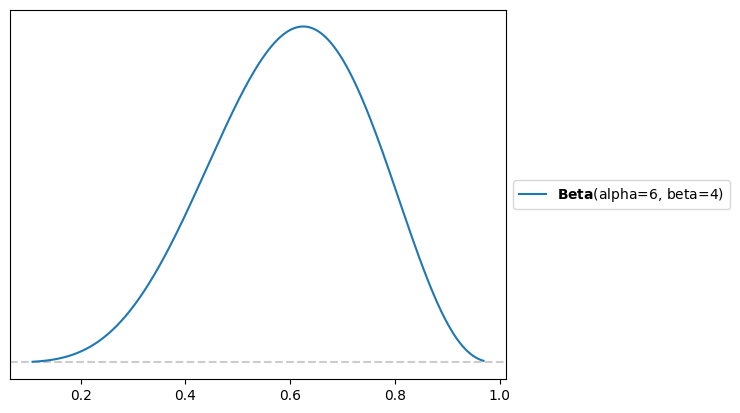

In [38]:
#plotting the beta distribution with shape parameter 6 and scale parameter 4
pz.Beta(alpha=6,beta=4).plot_pdf()

## **Likelihood**

Now that we have graphed our prior with the beta distrubtion graph, let's now find and graph the likelihood using his collegiate data. For our prior, we guessed that out of 10 games, while considering the assumptions, he will score a rushing or recieving touchdown in 6 games and he wont in 4. Now, using his collegiate data (not including his rookie season) which I have given the link two before, we will combine that information with our prior to get our likelihood.

To actually do this, we will use Pymc's preliz function to make a binomial distrubtion which will be our likelihood.


<Axes: >

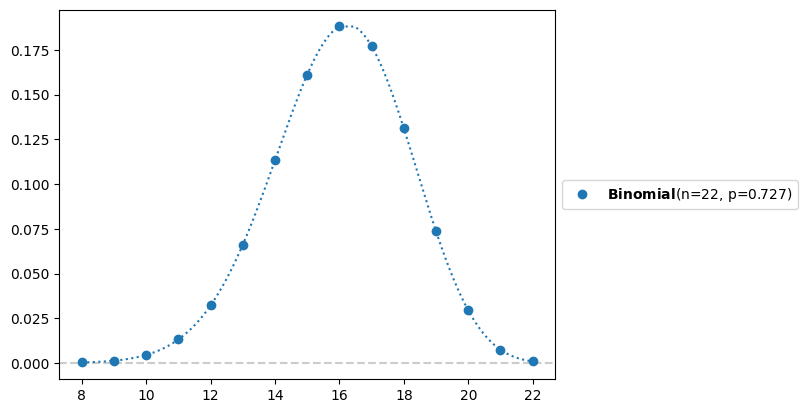

In [39]:
pz.Binomial(n = 22, p = 16/22 ).plot_pdf()

And now to get to our best guess using this analytical model, we will graph the whole distribution which just combines the prior's numbers as well as his collegiate data.

This whole distribution is the graph below:

<Axes: >

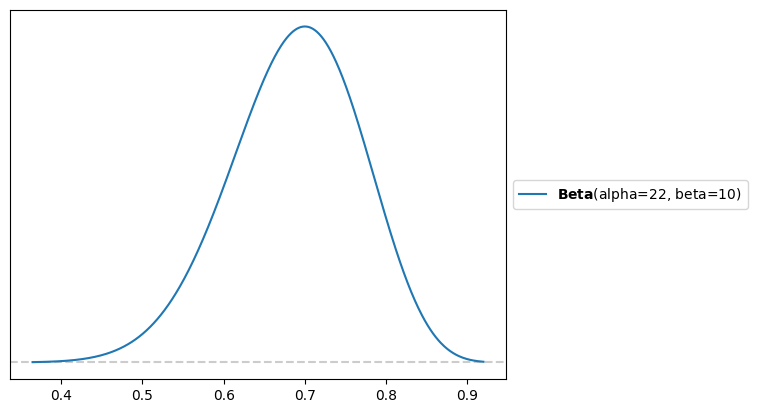

In [40]:
pz.Beta(alpha=22,beta=10).plot_pdf()

As you can see, it is slightly different from our prior because we just added some more data.


Now that we have done some prediction with his touchdown percentage, let's predict the actual game by game results of this next upcoming season using Pymc.  

#**Part 2: Pymc Model and Graphing the Posterior**

There is an analytic solution to predicting Bijans touchdowns; however, we will not be using it. The analytic solution involves the calculation of this integral $ \int_{}^{} p(\tilde{y}|θ)p(θ|y) \,dθ  $. In order to avoid tediously calculating this massive integral, we will make use of the Pymc library of functions, which will make everything easier. The Pymc library is also the only thing we have used and learned till this point which is another reason why we are using it.

For this prediction, we will use the data collected from Bijan's collegiate season at the University of Texas. The link to this data can be found up above.

So now before we make any actual predictions, let's redo the analysis with Pymc.



In [41]:
#The games where we have seen touchdowns when he has played over 50% of snaps
Tuddy_in = np.repeat(1, 16)

#The games where he doesnt get a touchdown with playing over 50% of snaps
Tuddy_out = np.repeat(0, 6)

#combine the games into an array
FT_data = np.concatenate( [Tuddy_in,Tuddy_out] )

with pm.Model() as bj_td_model:
  #we define our prior with our prediction for his percentage of games
  #notice how we make alpha and beta floats by using '.'
  θ = pm.Beta('θ' , alpha = 6. , beta = 4.)

  #we define our likelihood, which is how we process the touchdowns
  #we've seen Bijan score in the NFL
  #Think of Bernoulli as a stand in for the binomial distribution
  #This allow us to predict one game at a time later, among other things
  y = pm.Bernoulli('y', p = θ, observed = FT_data)

  #this part is new. We sample from our posterior because we don't actually
  #have a formula for it.
  idata_TD = pm.sample(1000)

And let's plot

<Axes: title={'center': 'θ'}>

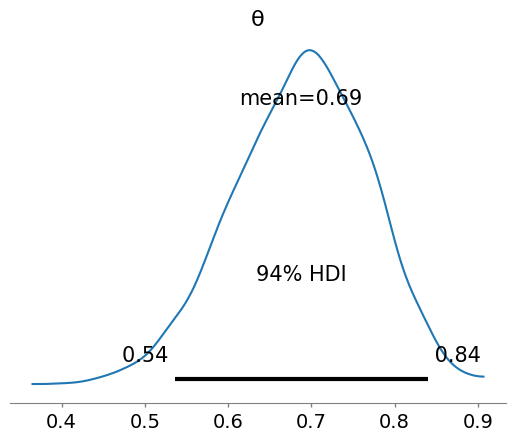

In [42]:
#vizualize the 1000 samples from the pymc model of the posterior
az.plot_posterior(idata_TD)

If you compare this graph with the other analytical graph that we created in the previous part using the beta distrubution, you can see that both graphs are very similar which is good.

However, you may have noticed that we used his collegiate data for this Pymc model. Given our assumptions in the beginning, we assumed that the NFL is extremely volatile, which in this case is way more volatile than CFB. So now instead of using his collegiate data to plot the points and calculate the percentage, lets use his rookie season NFL stats which will reflect the true percentage a bit more. In his first season, he was able to score a recieving and/or rushing touchdown in 7 games in which he played over 50% of snaps. The rest of the games which he played over 50% of the snaps, which was 9 other games, he did not get any touchdowns. You my notice that this does not add up to 17 games, it only adds up to 16, and this is because there was one game mid way through the season last year where he played only 1 snap, meaning his snap percentage was below 50%. Since playing above 50% of snaps is one of our assumptions, we will not be considering this one game in our data.

This [link](https://www.pro-football-reference.com/players/R/RobiBi01/gamelog/2023/advanced/) is where you can find his 2023 NFL season statistcs.

Now let's model this.

In [43]:
Tuddy_in23 = np.repeat(1, 7)

Tuddy_out23 = np.repeat(0, 9)


FT_data = np.concatenate( [Tuddy_in23,Tuddy_out23] )

with pm.Model() as bj_td_model:

  θ = pm.Beta('θ' , alpha = 6. , beta = 4.)


  y = pm.Bernoulli('y', p = θ, observed = FT_data)

  idata_TD23 = pm.sample(1000)

And now let's plot the prediction for his games:

<Axes: title={'center': 'θ'}>

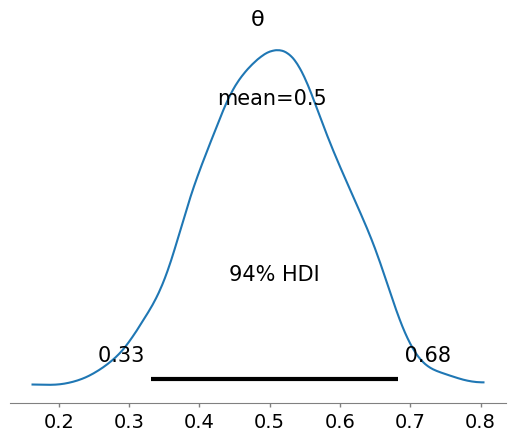

In [44]:
#vizualize the 1000 samples from the pymc model of the posterior
az.plot_posterior(idata_TD23)

And now we have the prediction for Bijan's next 16 games that he has played over 50% of the snaps.

#**Part 3: Conclusion**

Now that we have done our prediction and ploted our data points using the pymc library, we can now choose a percentage from the wide variety we have gotten from our prediction model. I will personally be using the mean 0.5, also can be written as 50%, as the percentage that Bijan will be able to score a touchdown, rushing or recieving, in any given game.

Pertaining to the 50% that our Pymc model gave us, I was not that surprised because with the data I gave it from his NFL rookie year, his percentage wasn't that great when taking it at face value, which is what the model does.

